In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import linalg, integrate, misc
from matplotlib import pyplot as plt

In [9]:
N = 16
alpha = 1
beta = 1

eq1 = (lambda x: -(4-x) / (5-2*x),\
       lambda x: (1-x) / 2,\
       lambda x: np.log(3+x)/2,\
       lambda x: 1 + x/3)

eq2 = (lambda x: -1/(x-3),\
       lambda x: 1 + x/2,\
       lambda x: np.exp(x/2),
       lambda x: 2-x)

eq3 = (lambda x: -(6 + x) / (7 + 3 * x), \
       lambda x: -(1 - x / 2), \
       lambda x: 1 + np.cos(x) / 2, \
       lambda x: 1 - x / 3)

eq4 = (lambda x: (x-2) / (x+2), \
       lambda x: x, \
       lambda x: 1 - np.sin(x), \
       lambda x: x*x)


k, v, q, f = eq4

begin = -1
end = 1


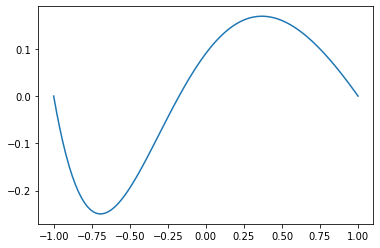

NameError: name 'prev' is not defined

In [10]:
#coord_func = [lambda x: (1-x*x)*sp.special.eval_jacobi(i, alpha, beta, x) for i in range(N)]
def phi_i(i, x):
    return (1-x*x)*sp.special.eval_jacobi(i, alpha, beta, x)

def col_j(i, x):
    return k(x)*sp.misc.derivative(lambda t: phi_i(i, t), x, dx=1e-1, n=2, order=5)\
            + v(x)*sp.misc.derivative(lambda t: phi_i(i, t), x, dx=1e-1, n=1, order=5)\
            + q(x)*phi_i(i, x)

#cols = [col_j(j) for j in range(N)]
#B = np.array([sp.integrate.quad(col_) for col in A])
B = np.zeros((N-2, N-2))
C = np.zeros(N-2)
for i in range(N-2):
    C[i] = integrate.quad(lambda x: f(x)*phi_i(i+1, x), begin, end)[0]
    for j in range(N-2):
        func = lambda x: col_j(j+1, x)*phi_i(i+1, x)
        B[i, j] = sp.integrate.quad(func, begin, end)[0]

A = np.zeros(N)
A[1:-1] = linalg.solve(B, C)
A[0] = 0
A[-1] = 0
#A = np.zeros(N)
#A = linalg.solve(B, C)
u = lambda x: np.sum([A[i]*phi_i(i, x) for i in range(N)])

segm = np.linspace(begin, end, 100)
u_vect = np.vectorize(u)
curr = u_vect(segm)
plt.plot(segm, curr)
plt.show()
plt.plot(segm, prev)
prev = curr